# Testing Assumptions
1. State Assumptions
2. Check Assumptions with figures using:
    * residuals
    * correlations
    * Number of modes

## Step 1: State Assumptions For Our Data
We have data X = {$X_i: i={1,...,n}, X_i ~ i.i.d. F$}

1. X_i are all identically and independently distributed in the distribution F.

All our data is i.i.d. So can check using a correlation matrix -> only checks for linear dependencies
-> can plot histogram of correlations to see if there are outliers

Plot scatter plots of each X_i with each other


paired scatter plots - plot subsamples

## Step 2: Check Assumptions

Ideas: Compute the comparison statistic for independence for "rows" closest to each other vs. farthest away
Read paper and compute the independence test

In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv, json
import math
import random

from matplotlib import *
from matplotlib import pyplot as plt

import scipy
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# write new list_of_features to new txt file
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)

In [3]:
# 01A

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# read in normalized data locations
csvfile = "data_normalized/locations_normalized.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [58]:
# 01B

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
#### this is only to run for non-normalized to see if we get the same results
csvfile = "data/synapsinR_7thA.tif.Pivots.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [104]:
ten_means = MiniBatchKMeans(n_clusters=10).fit(list_of_features)

In [105]:
true_means = MiniBatchKMeans(n_clusters=17).fit(list_of_features)

In [106]:
thirty_means = MiniBatchKMeans(n_clusters=30).fit(list_of_features)

(10, 96)
(17, 96)
(30, 96)


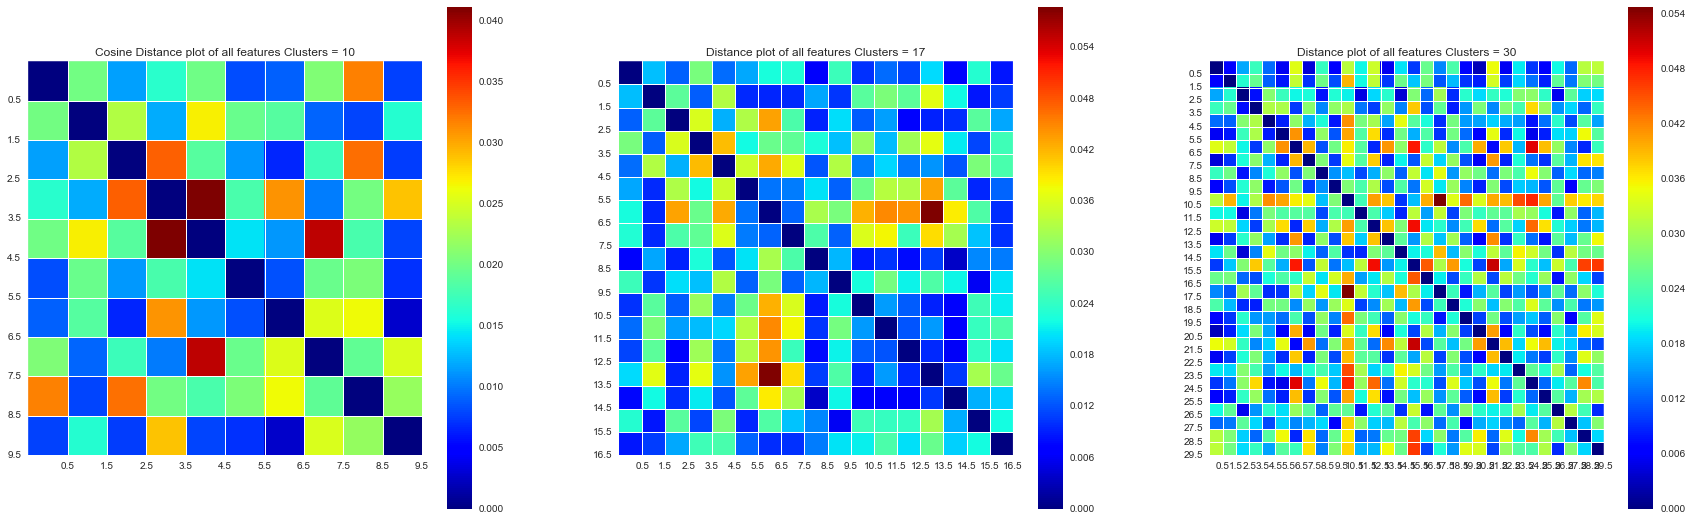

In [109]:
# compute distances between each centroid
centroids = ten_means.cluster_centers_
print centroids.shape
distances = scipy.spatial.distance.pdist(centroids, metric='cosine')
distances = scipy.spatial.distance.squareform(distances)

true_centroids = true_means.cluster_centers_
print true_centroids.shape
true_distances = scipy.spatial.distance.pdist(true_centroids, metric='cosine')
true_distances = scipy.spatial.distance.squareform(true_distances)

thirty_centroids = thirty_means.cluster_centers_
print thirty_centroids.shape
thirty_distances = scipy.spatial.distance.pdist(thirty_centroids, metric='cosine')
thirty_distances = scipy.spatial.distance.squareform(thirty_distances)

# Plot the distances
fig = plt.figure(figsize=(30,9))
fig.add_subplot(131)
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Cosine Distance plot of all features Clusters = 10")
plt.yticks(np.arange(0.5,10.5, 1))
plt.xticks(np.arange(0.5,10.5, 1))
plt.colorbar()

fig.add_subplot(132)
plt.imshow(true_distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Distance plot of all features Clusters = 17")
plt.yticks(np.arange(0.5,17.5, 1))
plt.xticks(np.arange(0.5,17.5, 1))
plt.colorbar()

fig.add_subplot(133)
plt.imshow(thirty_distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Distance plot of all features Clusters = 30")
plt.yticks(np.arange(0.5,30.5, 1))
plt.xticks(np.arange(0.5,30.5, 1))
plt.colorbar()

['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']


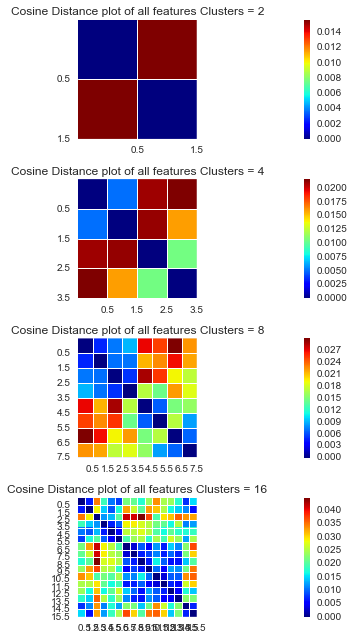

In [21]:
## Running multi scale clustering
numFigs = len(range(2,18,2))

def kmeanTwo(features):
    true_means = MiniBatchKMeans(n_clusters=2).fit(features)
    
    labels = np.unique(true_means.labels_)
    
    # create two clusters
    cluster1 = features[true_means.labels_ == labels[0]]
    cluster2 = features[true_means.labels_ == labels[1]]
    
    clusters = {}
    clusters['0'] = cluster1
    clusters['1'] = cluster2
    return clusters

temp_features = list_of_features

# n = 5
# indices = np.arange(1, math.pow(2,(n-1))+1)
# temp_cluster1, temp_cluster2 = kmeanTwo(temp_features) 

def multiScaleKMeans(clusters):    
    new_clusters = {}
    
    index = 0
    for key in clusters.keys():
        # return the two clusters for another key
        temp_clusters = kmeanTwo(clusters[key])
        
        new_clusters[str(index)] = temp_clusters['0']
        index = index+1
        new_clusters[str(index)] = temp_clusters['1']
        index += 1
        
#         print "In function: "
#         print clusters[key].shape
#         print temp_clusters['0'].shape
#         print temp_clusters['1'].shape
    
    return new_clusters

new_clusters = {}
fig = plt.figure(figsize=(30,9))
for i in range(0,4):
    if i == 0:
        # initial break up    
        new_clusters = kmeanTwo(temp_features)
    else:
        new_clusters = multiScaleKMeans(new_clusters)
    
    numticks = len(np.unique(new_clusters.keys()))
    
    # get the euclidean centroids of each cluster
    true_centroids = []
    for key in new_clusters.keys():
        true_centroids.append(np.mean(new_clusters[key], axis=0))
    true_centroids = np.array(true_centroids)
    true_distances = scipy.spatial.distance.pdist(true_centroids, metric='cosine')
    true_distances = scipy.spatial.distance.squareform(true_distances)

    # Plot the distances
    fig.add_subplot(4,1,i+1)
    plt.imshow(true_distances, cmap=plt.get_cmap('jet'), interpolation='none')
    plt.title("Cosine Distance plot of all features Clusters = " + str(numticks))
    plt.yticks(np.arange(0.5,numticks+0.5, 1))
    plt.xticks(np.arange(0.5,numticks+0.5, 1))
    plt.colorbar()
    
plt.tight_layout()
print sorted(new_clusters.keys())

In [22]:
# summ = 0
# for key in new_clusters.keys():
#     summ += new_clusters[key].shape[0]
#     print new_clusters[key].shape
# print summ

# go through each label and assign to cluster, and then PCA each cluster 
cluster = {}
summ = 0
for label in np.unique(true_means.labels_):
    indices = true_means.labels_ == label
    cluster[str(label)] = list_of_features[indices,:]

# pca on each cluster
pca = PCA(n_components=3)

pca_clusters = {}
for label in np.unique(cluster.keys()):
    X = pca.fit_transform(cluster[label])
    pca_clusters[str(label)] = X
#     print X.shape

/Users/adam2392/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


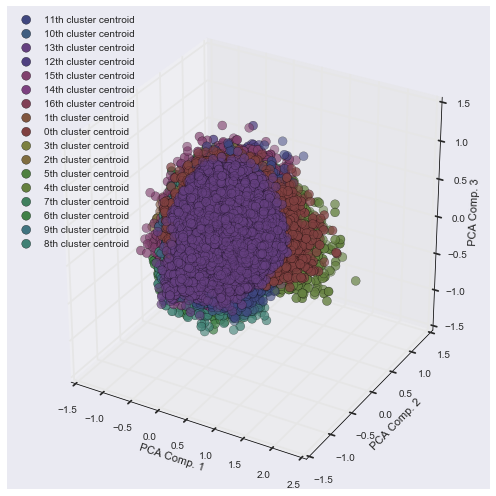

In [124]:
# plot all centroids in 3D space
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

import colorsys
ClusterIdx = np.array(pca_clusters.keys())
nColors = len(np.unique(ClusterIdx))
HSV_tuples = [(x*1.0/nColors, 0.5, 0.5) for x in range(nColors)]
Colors = np.array(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
ClusterIdx = [float(f) for f in ClusterIdx]
Cluster2Colors = Colors[ClusterIdx].tolist()

index = 0
for key in pca_clusters.keys():
    cluster = pca_clusters[key]
    # Plot both the vectors in 3D space
    label = str(key) + 'th cluster centroid'
    ax.scatter3D(cluster[:,0], cluster[:,1], cluster[:,2], c=Cluster2Colors[index], label=str(label), s=80)
    index += 1

# ax.set_xlim((-1.5e-13, 1.0e-13))
# ax.set_ylim((-0.5e-12, 1.1e-12))
# ax.set_zlim((-8e-13, 2e-13))
ax.set_xlabel('PCA Comp. 1')
ax.set_ylabel('PCA Comp. 2')
ax.set_zlabel('PCA Comp. 3')
ax.legend(loc='upper left')
plt.tight_layout()

## Ideas:
Cluster 17 clusters in locations and then assign cluster values to the actual features. 

In [123]:
print pca_clusters.keys()
print pca_clusters['0'].shape
# X = list_of_features[np.random.choice(range(list_of_features.shape[0]), size=1000, replace=False), :]
# print X.shape
# true_means = AgglomerativeClustering(n_clusters=17, affinity='euclidean').fit(X)

['11', '10', '13', '12', '15', '14', '16', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8']
(55132, 3)


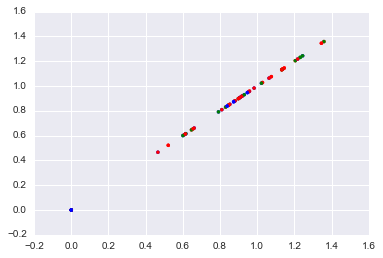

In [34]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

spectral = cluster.SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")

test = spectral.fit_predict(distances)
#  plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
plt.scatter(distances, distances, color=colors[test], s=10)
# plt.imshow(distances, s=10)
# fig = plt.figure(figsize=(10,10))
# plt.imshow(distances, cmap=plt.get_cmap('jet'))
# plt.title("Distance plot of all features Clusters")
# plt.yticks(np.arange(0.5,10.5, 1))
# plt.xticks(np.arange(0.5,10.5, 1))
# plt.colorbar()

In [38]:
true_indices = true_means.predict(list_of_features)

%reset_selective ten_means thirty_means

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [64]:
from collections import defaultdict

clusters = defaultdict(list)
location_clusters = defaultdict(list)

for i in range(0, len(true_indices)):
    clusters[true_indices[i]].append(list_of_features[i])
    location_clusters[true_indices[i]].append(list_of_locations[i])
    
print clusters.keys()
print location_clusters.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [54]:
sum_clust = 0
for key in clusters.keys():
#     sum_clust += len(clusters[key])
#     print len(clusters[key])
    sum_clust += len(location_clusters[key])
    print len(location_clusters[key])

print sum_clust
print len(list_of_features)

58573
159998
65913
52248
28354
64676
22123
85302
53477
45084
71633
80299
73304
130366
8928
69539
49482
1119299
1119299


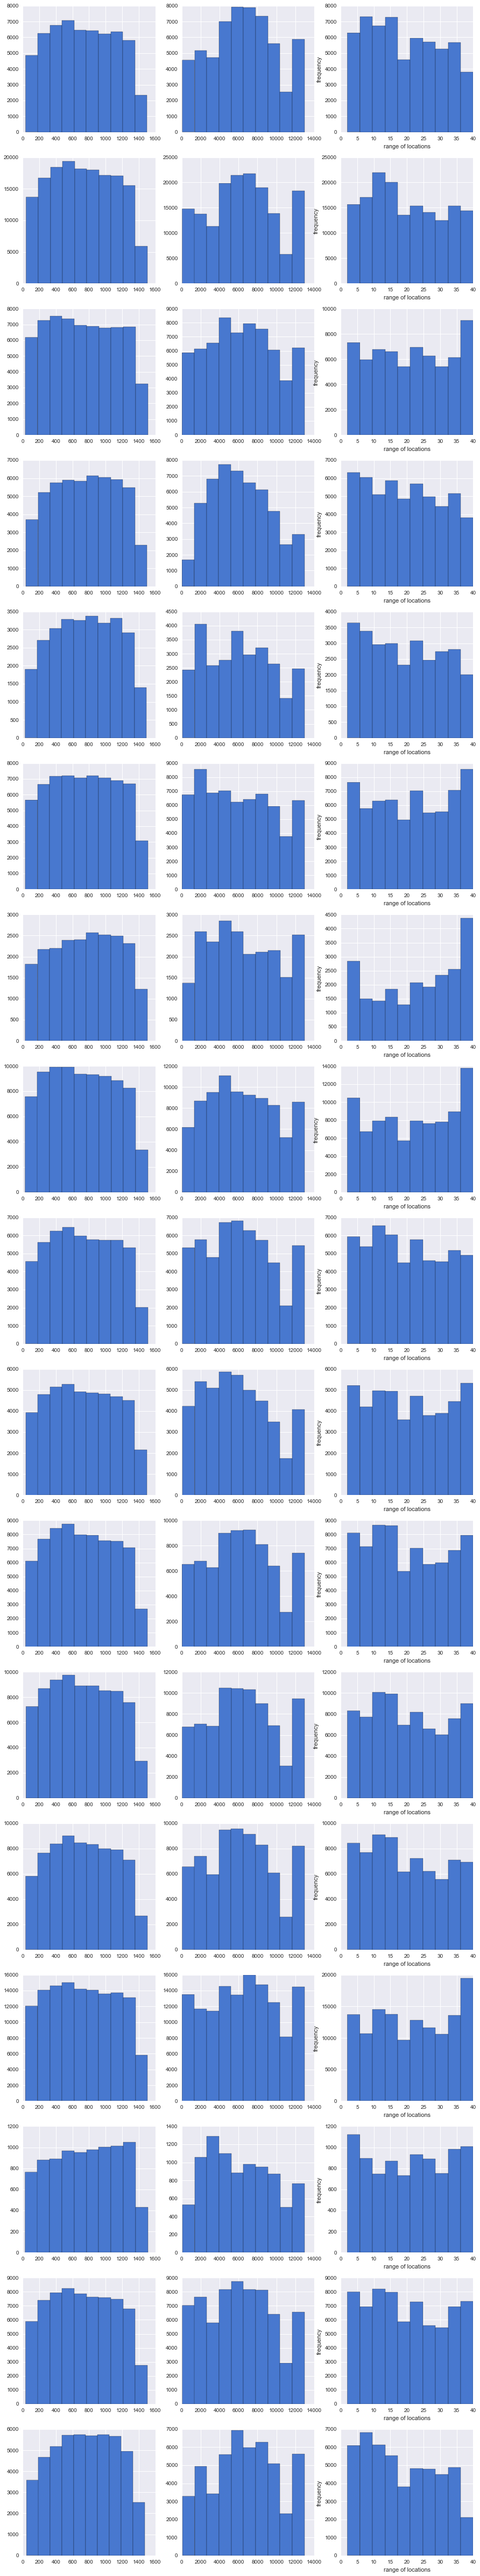

In [61]:
#### plot of all locations <x,y,z> for all 17 clusters
fig = plt.figure(figsize=(15,5*17))

numrows = math.ceil(len(location_clusters.keys())/3.) # row in subplot
numrows = len(location_clusters.keys())

# plt.show()
index = 0
for i in location_clusters.keys():
    locations = np.array(location_clusters[i])
    
    x_locs = locations[:,0]
    y_locs = locations[:,1]
    z_locs = locations[:,2]

    # plot histogram
    plt.subplot(numrows, 3, index+1)
    plt.hist(x_locs)
    plt.subplot(numrows, 3, index+2)
    plt.hist(y_locs)
    plt.subplot(numrows, 3, index+3)
    plt.hist(z_locs)
    plt.xlabel('range of locations')
    plt.ylabel('frequency')
    
    index += 3 # index for the locations

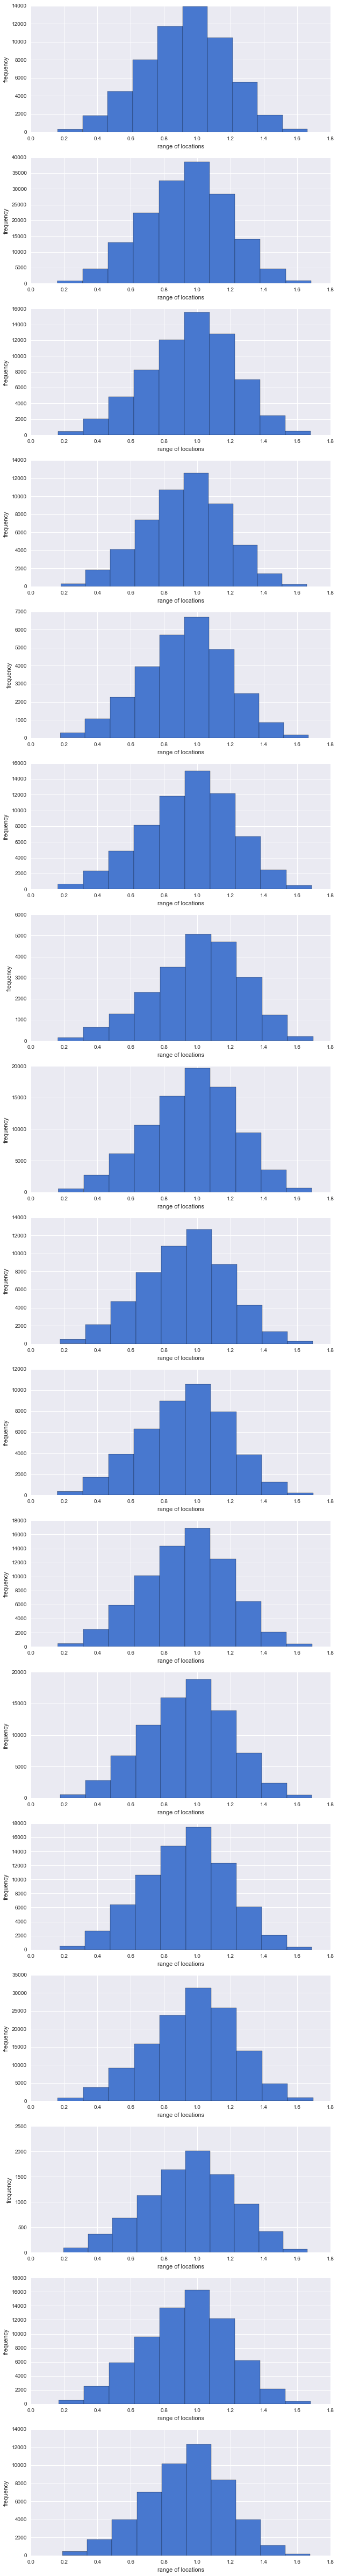

In [65]:
fig = plt.figure(figsize=(10,5*17))

index = 1
for i in location_clusters.keys():
    locations = np.array(location_clusters[i])
    locations = np.linalg.norm(locations, axis=1)
    
    # plot histogram
    plt.subplot(numrows, 1, index)
    plt.hist(locations)
    plt.xlabel('range of locations')
    plt.ylabel('frequency')
    
    index += 1 # index for the locations
# print list_of_locations

## Independence Testing
Here we are testing for independence in our various data. One thing we want to test is if all our features collected are independent from another.

Another hypothesis we would like to test is independence in data points close to others vs. far away.

03/09/16: Not working with large samples... Possibly because of the bootstrapping occuring within the test?

In [3]:
#### Set up R Independence Test 
np.random.seed(12345678)  # for reproducibility, set random seed

from rpy2 import robjects
from rpy2.robjects import r

#### Rejects if dependent data
r('''
f <- function(x, y, verbose=FALSE) {
    if (verbose) {
        cat("I am calling independence test with energy package.\n")
    }
    energy::indep.test(x, y, method="mvI", R=20)
}
''')

indep_test = r['f']

X = list_of_features[np.random.choice(range(list_of_features.shape[0]), size=1000, replace=False), :]
print X.shape

(1000, 96)


/Users/adam2392/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [ ]:
x = robjects.FloatVector(X[:,0])
y = robjects.FloatVector(X[:,24])

test = indep_test(x,y, True)
pval = test[4]
print test
print pval
# r('''
# x <- sin(runif(30, 0, 2*pi) * 2)
# y <- sin(runif(30, 0, 2*pi) * 4)
# test = energy::indep.test(x, y, method="mvI", R=20)
# print(test)
# ''')


In [78]:
np.random.seed(12345678)  # for reproducibility, set random seed

# Need to first downsample
rand_indices = random.sample(range(0,len(list_of_locations)), 50000)

# print list_of_locations[rand_indices]
# compute distance matrix of all locations relative to another
true_distances = scipy.spatial.distance.pdist(list_of_locations[rand_indices])

# downsample features and locations
list_of_features = list_of_features[rand_indices]
list_of_locations = list_of_locations[rand_indices]

print len(true_distances)
print true_distances.shape

1249975000
(1249975000,)


In [ ]:
##### Testing independence for each row that is close to another vs. farthest away #####
# 01: get feature
# 02: get closest and farthest feature using euclidean norm
# 03:

n = len(list_of_features)
pvals = np.array(())

print "The new length of features is: ", n
##01: Get Features
for i in range(0, len(list_of_features)): # loop through each feature and perform step 2
    feature = list_of_features[i] # get current features
    
    ##02: Get closest and farthest feature
    location = list_of_locations[i] # get location
    
    # search for closest location using euclidean norm
    # search for all j's * i through pdist struct
    j = range(i+1, n)
    if i == 0:
        indices_to_search = j
    else:
        indices_to_search = np.dot(i,j)
    
    # store the locations of the ones we have to search through for min/max
    compare_locations = true_distances[indices_to_search]
    close_index = list(compare_locations).index(min(compare_locations))
    far_index = list(compare_locations).index(max(compare_locations))
    
    # convert to indices in the list_of_locations/list_of_features
    if i==0:
        close_index = close_index
        far_index = far_index
    else:
        close_index = close_index/i
        far_index = far_index/i
    
    # find close and far feature
    close_feature = list_of_features[close_index]
    far_feature = list_of_features[far_index]
    
    ##03: compute independence test
    # first convert things to R data structures
    close_feature = robjects.FloatVector(close_feature)
    far_feature = robjects.FloatVector(far_feature)
    feature = robjects.FloatVector(feature)
    
    test_close = indep_test(feature, close_feature)
    test_far = indep_test(feature, far_feature)
    pval_close = test_close[4]
    pval_far = test_far[4]
    
    pvals = np.append(pvals, (pval_close, pval_far))

# Discussion:
Looking at the locations spread in each cluster, it's always bimodal...?